In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import sys
sys.path.insert(0, '../.')

In [5]:
from data.preprocessing import *

In [6]:
import glob
import os

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

In [9]:
# from kdtree import *

In [10]:
from tqdm import tqdm

In [11]:
from multiprocessing import Pool
import datetime

In [12]:
import numpy as np
# import faiss

In [13]:
from model import *

In [14]:
from Trainer import *

In [15]:
model = Model()

In [18]:
model.final_output

<tf.Tensor 'lidar_branch/concat_2:0' shape=(?, 128, 112, 2, 9) dtype=float32>

In [ ]:
with model.graph.as_default():
    with tf.Session() as sess:
        final_output = sess.run(model.final_output)

In [ ]:
anchors_values.shape

In [35]:
anchors_values[0][40, 1, 1, :]

array([160.  ,   4.  ,   1.  ,   2.08,   2.59,   6.05], dtype=float32)

In [17]:
model.train()

[0. 1.]
Generating the kdtree
Start training


[]

In [172]:
dataset = make_dataset(batch_size=1)

In [180]:
# with model.graph.as_default():
with tf.Session() as sess:
    camera_tensor, lidar_tensor, label_tensor, Tr_velo_to_cam, R0_rect, P3, shift_h, shift_w = sess.run(dataset)  
    camera_tensor, lidar_tensor, label_tensor, Tr_velo_to_cam, R0_rect, P3, shift_h, shift_w = sess.run(dataset)  

/Volumes/My Passport/Kitti_data/training/label_2/002970.txt
/Volumes/My Passport/Kitti_data/training/label_2/005525.txt


In [133]:
label_tensor.shape

(1, 128, 112, 2, 9)

In [134]:
output_indx = np.where(label_tensor>0)

In [135]:
output_indx

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  0,   0,   0,   0,   0,   0,   0, 124, 124, 124, 124, 124, 124,
        124, 124, 124, 124, 124, 124]),
 array([10, 10, 10, 10, 10, 10, 10, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15,
        15, 15]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 2, 3, 4, 5, 7, 8, 2, 4, 5, 6, 7, 8, 2, 4, 5, 6, 7, 8]))

In [136]:
indx = list(map(lambda i: [output_indx[j][i] for j in range(4)], range(len(output_indx[0]))))
indx

[[0, 0, 10, 1],
 [0, 0, 10, 1],
 [0, 0, 10, 1],
 [0, 0, 10, 1],
 [0, 0, 10, 1],
 [0, 0, 10, 1],
 [0, 0, 10, 1],
 [0, 124, 13, 1],
 [0, 124, 13, 1],
 [0, 124, 13, 1],
 [0, 124, 13, 1],
 [0, 124, 13, 1],
 [0, 124, 13, 1],
 [0, 124, 15, 1],
 [0, 124, 15, 1],
 [0, 124, 15, 1],
 [0, 124, 15, 1],
 [0, 124, 15, 1],
 [0, 124, 15, 1]]

In [137]:
label_tensor[0, 0, 10, 1]

array([ 0.6175   , -0.31     ,  0.9125   ,  7.5437813,  1.68     ,
       26.217205 , -1.42     ,  1.       ,  1.       ], dtype=float32)

In [98]:
label_tensor[0,0,10,1,:]

array([ 0.6175   , -0.31     ,  0.9125   ,  7.5437813,  1.68     ,
       26.217205 , -1.42     ,  1.       ,  1.       ], dtype=float32)

In [76]:
label_tensor[0,123,13,1,:]

array([-1.6474064e+01, -3.9999999e-02,  3.9560001e+01, -3.7814606e+01,
        1.1400000e+00,  1.0315633e+02,  1.6200000e+00,  1.0000000e+00,
        1.0000000e+00], dtype=float32)

In [44]:
label_tensor[0,0,10,1,:]

array([  0.6175   ,  -1.8275   , -69.0875   ,  -0.6796146,  -3.855    ,
       -97.17472  ,  -1.42     ,   1.       ,   1.       ], dtype=float32)

In [54]:
with model.graph.as_default() as g:
    model_vars = tf.trainable_variables()

In [56]:
slim.model_analyzer.analyze_vars(model_vars, print_info=True)

---------
Variables: name (type shape) [size]
---------
network/conv2d/kernel:0 (float32 7x7x3x64) [9408, bytes: 37632]
network/batch_normalization/gamma:0 (float32_ref 64) [64, bytes: 256]
network/batch_normalization/beta:0 (float32_ref 64) [64, bytes: 256]
network/resblock_10/conv2d_1/kernel:0 (float32 3x3x64x64) [36864, bytes: 147456]
network/resblock_10/batch_normalization/gamma:0 (float32_ref 64) [64, bytes: 256]
network/resblock_10/batch_normalization/beta:0 (float32_ref 64) [64, bytes: 256]
network/resblock_10/conv2d_2/kernel:0 (float32 3x3x64x64) [36864, bytes: 147456]
network/resblock_10/batch_normalization_1/gamma:0 (float32_ref 64) [64, bytes: 256]
network/resblock_10/batch_normalization_1/beta:0 (float32_ref 64) [64, bytes: 256]
network/resblock_11/conv2d_3/kernel:0 (float32 3x3x64x64) [36864, bytes: 147456]
network/resblock_11/batch_normalization/gamma:0 (float32_ref 64) [64, bytes: 256]
network/resblock_11/batch_normalization/beta:0 (float32_ref 64) [64, bytes: 256]
netwo

network_lidar/resblock4_10/conv_0/conv2d/kernel:0 (float32_ref 3x3x256x256) [589824, bytes: 2359296]
network_lidar/resblock4_10/batch_norm_0/beta:0 (float32_ref 256) [256, bytes: 1024]
network_lidar/resblock4_10/batch_norm_0/gamma:0 (float32_ref 256) [256, bytes: 1024]
network_lidar/resblock4_10/conv_1/conv2d/kernel:0 (float32_ref 3x3x256x256) [589824, bytes: 2359296]
network_lidar/resblock4_10/batch_norm_1/beta:0 (float32_ref 256) [256, bytes: 1024]
network_lidar/resblock4_10/batch_norm_1/gamma:0 (float32_ref 256) [256, bytes: 1024]
network_lidar/resblock4_11/conv_0/conv2d/kernel:0 (float32_ref 3x3x256x256) [589824, bytes: 2359296]
network_lidar/resblock4_11/batch_norm_0/beta:0 (float32_ref 256) [256, bytes: 1024]
network_lidar/resblock4_11/batch_norm_0/gamma:0 (float32_ref 256) [256, bytes: 1024]
network_lidar/resblock4_11/conv_1/conv2d/kernel:0 (float32_ref 3x3x256x256) [589824, bytes: 2359296]
network_lidar/resblock4_11/batch_norm_1/beta:0 (float32_ref 256) [256, bytes: 1024]
netwo

(36835574, 147342296)

In [45]:
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

---------
Variables: name (type shape) [size]
---------
Total size of variables: 0
Total bytes of variables: 0


In [12]:
list_files = list(map(lambda x: x.split('.')[0], os.listdir('/Volumes/My Passport/Kitti_data/data_object_image_3/training/image_3')))

In [14]:
my_gen = data_generator(image_size=(370, 1224), lidar_size=(512, 448, 32))

(370, 1224, 3)


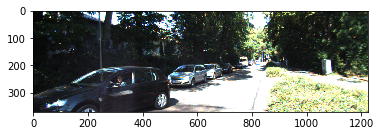

In [48]:
img, lidar_data, label, Tr_velo_to_cam, R0_rect, P3, shift_h, shift_w = next(my_gen)
print(img.shape)
plt.imshow(img)

In [49]:
lidar_data.shape

(512, 448, 32)

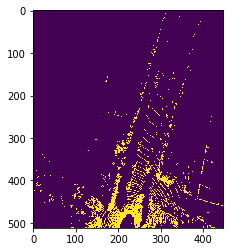

In [50]:
plt.imshow(np.clip(np.sum(lidar_data[:, :, :], 2), 0, 1))

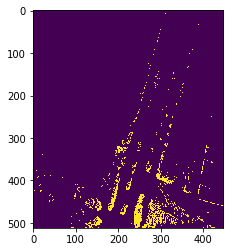

In [52]:
plt.imshow(np.clip(np.sum(lidar_data[:, :, 10:25], 2), 0, 1))

In [15]:
model = Model()

In [16]:
model.build_model()

Tensor("fusion_layer/map/while/map/while/map/while/map_1/while/truediv_1:0", shape=(?, 2), dtype=float32)
Tensor("fusion_layer/map/while/map/while/map/while/map_1/while/concat:0", shape=(?, 2), dtype=float32)
Tensor("fusion_layer/map/while/map/while/map/while/map_1/while/add_2:0", shape=(?, 2), dtype=float32)
Tensor("fusion_layer_1/map/while/map/while/map/while/map_1/while/truediv_1:0", shape=(?, 2), dtype=float32)
Tensor("fusion_layer_1/map/while/map/while/map/while/map_1/while/concat:0", shape=(?, 2), dtype=float32)
Tensor("fusion_layer_1/map/while/map/while/map/while/map_1/while/add_2:0", shape=(?, 2), dtype=float32)
Tensor("fusion_layer_2/map/while/map/while/map/while/map_1/while/truediv_1:0", shape=(?, 2), dtype=float32)
Tensor("fusion_layer_2/map/while/map/while/map/while/map_1/while/concat:0", shape=(?, 2), dtype=float32)
Tensor("fusion_layer_2/map/while/map/while/map/while/map_1/while/add_2:0", shape=(?, 2), dtype=float32)
Tensor("fusion_layer_3/map/while/map/while/map/while/ma

In [ ]:
model.train()

xx (1, 1)
(1, 3, 4)
xxx


In [ ]:
temp = model.kdtrees

In [ ]:
temp.shape

In [29]:
def velo_points_bev2(lidar_path, x_range=(0, 70), y_range=(-40, 40), z_range=(-2.5, 1), size=(512, 448, 32)):
    """
    # TODO :  8-neighbor interpolation
    """
    points = np.fromfile(lidar_path, dtype=np.float32).reshape(-1, 4)
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    x_lim = in_range_points(x, x, y, z, x_range, y_range, z_range)
    y_lim = in_range_points(y, x, y, z, x_range, y_range, z_range)
    z_lim = in_range_points(z, x, y, z, x_range, y_range, z_range)

    x_size = (x_range[1] - x_range[0])
    y_size = (y_range[1] - y_range[0])
    z_size = (z_range[1] - z_range[0])
        
    x_fac = (size[0]-1) / x_size
    y_fac = (size[1]-1) / y_size
    z_fac = (size[2]-1) / z_size
    
    if x_range[0] < 0:
        x_lim = x_lim + -1*x_range[0]
    if y_range[0] < 0:
        y_lim = y_lim + -1*y_range[0]
    if z_range[0] < 0:
        z_lim = z_lim + -1*z_range[0]
        
    x_lim = -1 * (x_lim * x_fac).astype(np.int32) + size[0] - 1
    y_lim = -1 * (y_lim * y_fac).astype(np.int32) + size[1] - 1
    z_lim = -1 * (z_lim * z_fac).astype(np.int32) + size[2] - 1
    
    img = np.zeros([size[0], size[1], size[2]], dtype=np.uint8)
    # occupancy grid
    img[x_lim, y_lim, z_lim] = 255
    return img

In [37]:
def velo_points_bev3(lidar_path, x_range=(0, 70), y_range=(-40, 40), z_range=(-2.5, 1), size=(512, 448, 32)):
    """
    # TODO :  8-neighbor interpolation
    """
    points = np.fromfile(lidar_path, dtype=np.float32).reshape(-1, 4)
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    x_lim = in_range_points(x, x, y, z, x_range, y_range, z_range)
    y_lim = in_range_points(y, x, y, z, x_range, y_range, z_range)
    z_lim = in_range_points(z, x, y, z, x_range, y_range, z_range)

    x_size = (x_range[1] - x_range[0])
    y_size = (y_range[1] - y_range[0])
    z_size = (z_range[1] - z_range[0])
        
    x_fac = (size[0]-1) / x_size
    y_fac = (size[1]-1) / y_size
    z_fac = (size[2]-1) / z_size
    
    if x_range[0] < 0:
        x_lim = x_lim + -1*x_range[0]
    if y_range[0] < 0:
        y_lim = y_lim + -1*y_range[0]
    if z_range[0] < 0:
        z_lim = z_lim + -1*z_range[0]
        
    x_lim = -1 * (x_lim * x_fac).astype(np.int32) + size[0] - 1
    y_lim = -1 * (y_lim * y_fac).astype(np.int32) + size[1] - 1
    z_lim = -1 * (z_lim * z_fac).astype(np.int32) + size[2] - 1
    
    img = np.zeros([size[0], size[1], size[2]], dtype=np.uint8)
    # occupancy grid
    img[x_lim, y_lim, z_lim] = 255
    return list(zip(x_lim, y_lim, z_lim))

In [72]:
img = velo_points_bev2('/Volumes/My Passport/Kitti_data/data_object_velodyne/training/velodyne/000000.bin')

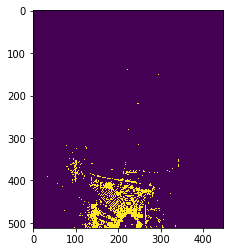

In [33]:
plt.imshow(np.clip(np.sum(img, 2), 0, 1))

In [34]:
lidar_size = (512, 448, 32)

In [61]:
indx = velo_points_bev3('/Volumes/My Passport/Kitti_data/data_object_velodyne/training/velodyne/000000.bin')

In [63]:
indx = np.array(indx)

In [65]:
len(points), indx.shape

(62773, (62773, 3))

In [66]:
# points

In [246]:
p = np.where(lidar_data > 0)
temp = np.array(list(map(lambda i: [p[0][i], p[1][i], p[2][i]], range(len(p[0])))))
print(temp.shape)

(25622, 3)


In [21]:
points = np.where(lidar_data > 0)
indx = np.array(list(map(lambda i: [points[0][i], points[1][i], points[2][i]], range(len(points[0])))))
xb = indx.astype('float32')
xq = np.array([(i, j, h) for i in range(lidar_size[0]) for j in range(lidar_size[1]) for h in range(lidar_size[2])]).astype('float32')

In [343]:
indx

array([[  0,  72,  26],
       [  0,  73,  28],
       [  0,  74,  26],
       ...,
       [511, 371,  30],
       [511, 372,   2],
       [511, 386,  18]])

In [22]:
indx.shape

(25622, 3)

In [23]:
k=1
index = faiss.IndexFlatL2(3)   # build the index
index.add(xb) 

In [24]:
%%time
D, I = index.search(xq, k) 

CPU times: user 14min 29s, sys: 12.3 s, total: 14min 41s
Wall time: 1min 52s


In [25]:
result = xq[I].reshape((-1, 3))
result = np.array(list(map(lambda p1: [p1[0], p1[1], p1[2], 1], result)))

result = result.reshape((lidar_size[0], lidar_size[1], lidar_size[2], k, 4))

In [26]:
result.shape

(512, 448, 32, 1, 4)

In [27]:
result[500, 400, 30, 0, :]

array([  1., 261.,  15.,   1.])

In [28]:
x_range=(0, 70)
y_range=(-40, 40)
z_range=(-2.5, 1)
size=(512, 448, 32)

x_size = (x_range[1] - x_range[0])
y_size = (y_range[1] - y_range[0])
z_size = (z_range[1] - z_range[0])
        
x_fac = (size[0]-1) / x_size
y_fac = (size[1]-1) / y_size
z_fac = (size[2]-1) / z_size

In [29]:
x_fac, y_fac, z_fac

(7.3, 5.5875, 8.857142857142858)

In [382]:
result.shape

(512, 448, 32, 1, 4)

In [30]:
result[500, 440, 2, 0, :] 

array([  1., 273.,  26.,   1.])

In [31]:
[-1, -1, -1] * np.array([   512, 448, 32]) / [x_fac, y_fac, z_fac] + [0, -40, -2.5] - [512, 448, 32]

array([-582.1369863 , -568.17897092,  -38.11290323])

In [341]:
-1 * np.array([ 1., 280.,   7.]) / [x_fac, y_fac, z_fac] + [0, -40, -2.5]

array([ -0.1369863 , -90.11185682,  -3.29032258])

In [365]:
p = np.array([0.        , -20.0,  -1.5])
p = p + [0, 40, 2.5]
p = -1 * (p * x_fac)
p + [512, 448, 32]

array([512. , 302. ,  24.7])

In [90]:
Tr_velo_to_cam.shape

(4, 4)

In [120]:
def project_point_from_camera_coor_to_img_coor(point, Tr_velo_to_cam, R0_rect, P3):
    img_point = P3.dot(R0_rect.dot(Tr_velo_to_cam.dot(point)))
    return img_point

def project_point_from_lidar_to_image(point, Tr_velo_to_cam, R0_rect, P3):
    point = tf.reshape(point, (-1, 4, 1))
    Tr_velo_to_cam2 = tf.reshape(Tr_velo_to_cam, (1, 4, 4))
    x = tf.matmul(tf.cast(Tr_velo_to_cam2, tf.float32), tf.cast(point, tf.float32))
    R0_rect2 = tf.reshape(R0_rect, (-1, 4, 4))
    x2 = tf.matmul(tf.cast(R0_rect2, tf.float32), x)
    P3_2 = tf.reshape(P3, (-1, 3, 4))
    rgb_point = tf.matmul(tf.cast(P3_2, tf.float32), x2)
#     return rgb_point[:, :2, 0]
    return rgb_point[:, :2, 0] / rgb_point[:, 2, 0]

In [220]:
result[500, 400, 30, 0, :]

array([  0., 102.,  23.,   1.])

In [121]:
point = project_point_from_lidar_to_image(result[500, 400, 30, 0, :], Tr_velo_to_cam, R0_rect, P3)

In [122]:
with tf.Session() as sess:
    print(sess.run(point))

[[4536826.   971450.7]]


In [123]:
Tr_velo_to_cam

array([[ 7.533745e-03, -9.999714e-01, -6.166020e-04, -4.069766e-03],
       [ 1.480249e-02,  7.280733e-04, -9.998902e-01, -7.631618e-02],
       [ 9.998621e-01,  7.523790e-03,  1.480755e-02, -2.717806e-01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [124]:
R0_rect

array([[ 0.9999239 ,  0.00983776, -0.00744505,  0.        ],
       [-0.0098698 ,  0.9999421 , -0.00427846,  0.        ],
       [ 0.00740253,  0.00435161,  0.9999631 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [125]:
P3

array([[ 7.215377e+02,  0.000000e+00,  6.095593e+02, -3.395242e+02],
       [ 0.000000e+00,  7.215377e+02,  1.728540e+02,  2.199936e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00,  2.729905e-03]])

In [345]:
indx

array([[  0,  72,  26],
       [  0,  73,  28],
       [  0,  74,  26],
       ...,
       [511, 371,  30],
       [511, 372,   2],
       [511, 386,  18]])

In [35]:
p = np.matmul(P3, 
          (np.matmul(R0_rect, 
                     np.matmul(Tr_velo_to_cam, np.array([-582.1369863 , -568.17897092,  -38.11290323, 1]))))) 

p = (p // p[2]) [ :2] + [shift_h, shift_w]
p.astype(int) 

array([-93, 140])

In [36]:
[shift_h, shift_w]

[1, 0]

In [283]:
points = np.fromfile('/Volumes/My Passport/Kitti_data/data_object_velodyne/training/velodyne/000000.bin', dtype=np.float32).reshape(-1, 4)

In [286]:
points = points[:, :3]

In [295]:
np.min(points[:, 0]), np.min(points[:, 1]), np.min(points[:, 2])

(-71.036, -21.105, -5.16)

In [298]:
np.where(points[:, 0] == 0)

(array([  5556,  65567,  67521,  83014,  85891,  94806, 100783]),)

In [303]:
np.where(points[:, 1] == 9)

(array([ 4271, 58960]),)

In [311]:
np.where(points[:, 2] == 0)

(array([15776, 15777, 17097, 17098, 17100, 17101, 18379, 18380, 18743,
        18744, 20040, 20161, 20300, 20301, 20302, 20303, 20565, 20566,
        20572, 20573, 21437, 21439, 21440, 21589, 21684, 21685, 21718,
        23338, 23448, 23449]),)

In [312]:
points[15776, 2]

-0.0

In [296]:
np.max(points[:, 0]), np.max(points[:, 1]), np.max(points[:, 2])

(73.039, 53.797, 2.672)

In [54]:
model = Model()

In [55]:
model.build_model()

TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
model.kdtrees = temp

In [17]:
model.train()

(1, 370, 1224, 3)
(1, 512, 448, 32)


AttributeError: 'Model' object has no attribute 'kdtrees'

In [19]:
temp = model.kdtrees

In [47]:
temp = temp.reshape((1, 512, 448, 32, 1, 3))

In [48]:
temp.shape

(1, 512, 448, 32, 1, 3)

In [20]:
lidar_size = (512, 448, 32)

In [60]:
points = np.where(lidar_data > 0)
indx = np.array(list(map(lambda i: [points[0][i], points[1][i], points[2][i]], range(len(points[0])))))
xb = indx.astype('float32')
xq = np.array([(i, j, h) for i in range(lidar_size[0]) for j in range(lidar_size[1]) for h in range(lidar_size[2])]).astype('float32')

In [62]:
k=1

In [63]:
index = faiss.IndexFlatL2(3)   # build the index
index.add(xb) 

D, I = index.search(xq, k) 
    

In [67]:
result = xq[I].reshape((-1, 3))
result = np.array(list(map(lambda p: [p[0], p[1], p[2], 1], result)))

result = result.reshape((lidar_size[0], lidar_size[1], lidar_size[2], k, 4))

In [68]:
result.shape

(512, 448, 32, 1, 4)

In [56]:
temp = KNN(lidar_data)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [20]:
lidar_data.shape

(512, 448, 32)

In [17]:
points = np.where(lidar_data > 0)
indx = np.array(list(map(lambda i: [points[0][i], points[1][i], points[2][i]], range(len(points[0])))))

In [19]:
indx.shape

(25622, 3)

In [25]:
d = 3                          # dimension
nb = 25622                      # database size
nq = 512 * 448 * 32                       # nb of queries
np.random.seed(1234)             # make reproducible
xb = indx.astype('float32')
xq = np.array([(i, j, k) for i in range(512) for j in range(448) for k in range(32)]).astype('float32')

In [26]:
xq.shape

(7340032, 3)

In [27]:
index = faiss.IndexFlatL2(d)   # build the index
index.add(xb) 

In [83]:
%%time
D, I = index.search(xq, 1) 

CPU times: user 15min 38s, sys: 25.8 s, total: 16min 4s
Wall time: 2min 9s


In [84]:
I.shape

(7340032, 1)

In [85]:
xq.shape

(7340032, 3)

In [86]:
I[:10]

array([[3],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [87]:
xq[I].shape

(7340032, 1, 3)

In [88]:
xb[:10]

array([[ 0., 72., 26.],
       [ 0., 73., 28.],
       [ 0., 74., 26.],
       [ 0., 76.,  2.],
       [ 0., 76.,  6.],
       [ 0., 76., 10.],
       [ 0., 77., 25.],
       [ 0., 78.,  8.],
       [ 0., 78., 13.],
       [ 0., 78., 15.]], dtype=float32)

In [91]:
xq[I].reshape((512, 448, 32, 3)).shape

(512, 448, 32, 3)

In [93]:
xq[I].reshape((512, 448, 32, 3))[:1]

array([[[[ 0.,  0.,  3.],
         [ 0.,  0.,  3.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  3.],
         [ 0.,  0.,  3.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  3.],
         [ 0.,  0.,  3.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        ...,

        [[ 0.,  5., 28.],
         [ 0.,  5., 28.],
         [ 0.,  5., 28.],
         ...,
         [ 0.,  5., 28.],
         [ 0.,  5., 28.],
         [ 0.,  5., 28.]],

        [[ 0.,  5., 28.],
         [ 0.,  5., 28.],
         [ 0.,  5., 28.],
         ...,
         [ 0.,  5., 28.],
         [ 0.,  5., 28.],
         [ 0.,  5., 28.]],

        [[ 0.,  5., 28.],
         [ 0.,  5., 28.],
         [ 0.,  5., 28.],
         ...,
         [ 0.,  5., 28.],
        

In [58]:
xq.shape[0] / 1000000

7.340032

In [56]:
D[:10]

array([[5780., 5812., 5860.],
       [5777., 5801., 5809.],
       [5760., 5776., 5792.],
       [5713., 5777., 5785.],
       [5668., 5780., 5780.],
       [5625., 5777., 5785.],
       [5584., 5776., 5792.],
       [5545., 5770., 5777.],
       [5508., 5729., 5780.],
       [5473., 5690., 5765.]], dtype=float32)

In [57]:
I[:10]

array([[3, 4, 0],
       [3, 4, 0],
       [0, 3, 4],
       [0, 3, 4],
       [0, 4, 3],
       [0, 4, 3],
       [0, 4, 3],
       [0, 1, 4],
       [0, 1, 4],
       [0, 1, 2]])

In [14]:
points = np.where(lidar_data > 0)
indx = np.array(list(map(lambda i: [points[0][i], points[1][i], points[2][i]], range(len(points[0])))))
kd = KNN(indx)

In [15]:
dist, ind = kd.tree.query([100, 100, 3], 3)

In [17]:
ind

array([405, 371, 366])

In [28]:
def helper_kdree(curent_tree, current_kdtree_indx, start_indx, end_indx):
        for i in range(start_indx, end_indx, 1):
            for j in range(448):
                for h in range(32):
                    current_points = current_tree.get_k_nearest_neighbors([i, j, h])
                    current_points = list(map(lambda p: np.append(p , 1), current_points))
                    current_kdtree_indx[i, j, h, :, :] = current_points
        return current_kdtree_indx

def prepare_kdree(lidar_data):

        points = np.where(lidar_data > 0)
        indx = np.array(list(map(lambda i: [points[0][i], points[1][i], points[2][i]], range(len(points[0])))))
        current_tree = KNN(indx)
        current_kdtree_indx = np.zeros((512, 448, 32, 1, 4))

        print(datetime.datetime.now())
        with Pool(processes=4) as pool:
#             results = pool.starmap(helper_kdree, 
#                                 [[current_tree, current_kdtree_indx, 0, 128],
#                                 [current_tree, current_kdtree_indx, 128, 256],
#                                 [current_tree, current_kdtree_indx, 256, 384],
#                                 [current_tree, current_kdtree_indx, 384, 512]])
            results = pool.starmap(helper_kdree, 
                                [[current_tree, current_kdtree_indx, 0, 60]])
        print(datetime.datetime.now())
        
prepare_kdree(lidar_data)

2019-05-27 00:39:39.116507
2019-05-27 00:44:27.845775


In [104]:
iterator = make_dataset()

In [119]:
with tf.Session() as sess:
    temp = sess.run(iterator)
    print(temp[0].shape)
    print(temp[1].shape)
    print(temp[2].shape)
    print(temp[3].shape)
    print(temp[4].shape)
    print(temp[5].shape)

(4, 370, 1224, 3)
(4, 512, 448, 32)
(4, 128, 112, 2, 9)
(4, 3, 4)
(4, 3, 3)
(4, 3, 4)


In [57]:
temp

(<tf.Tensor 'IteratorGetNext_3:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'IteratorGetNext_3:1' shape=<unknown> dtype=float32>,
 <tf.Tensor 'IteratorGetNext_3:2' shape=<unknown> dtype=float32>)

In [36]:
np.where(label > 0)

(array([  0,   0,   0, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124]),
 array([10, 10, 10, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 7, 8, 0, 3, 6, 7, 8, 0, 3, 6, 7, 8]))

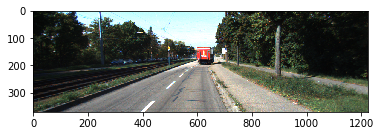

In [212]:
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle patch
rect = patches.Rectangle((785, 2306.5),40,30,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()


In [217]:
# label[0][0].reshape((-1, 3))

array([[ 2.47,  0.69, 43.65]])

In [38]:
np.max(lidar_data)

1.0

In [209]:
def in_range_points2(points, x, y, z, x_range, y_range, z_range):
    """ 
    This function is imported from https://github.com/windowsub0406/KITTI_Tutorial/blob/master/Convert_Velo_2_Topview_detail.ipynb
    extract in-range points 
    """
    return points[np.logical_and.reduce((x > x_range[0], x < x_range[1], y > y_range[0], \
                                         y < y_range[1], z > z_range[0], z < z_range[1]))]


def velo_points_bev2(points, x_range=(0, 70), y_range=(-40, 40), z_range=(-2.5, 1), size=(512, 448, 32)):
    """
    # TODO :  8-neighbor interpolation
    """
#     points = np.fromfile(lidar_path, dtype=np.float32).reshape(-1, 4)
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    x_lim = in_range_points2(x, x, y, z, x_range, y_range, z_range)
    y_lim = in_range_points2(y, x, y, z, x_range, y_range, z_range)
    z_lim = in_range_points2(z, x, y, z, x_range, y_range, z_range)

    x_size = (x_range[1] - x_range[0])
    y_size = (y_range[1] - y_range[0])
    z_size = (z_range[1] - z_range[0])
        
    x_fac = (size[0]-1) / x_size
    y_fac = (size[1]-1) / y_size
    z_fac = (size[2]-1) / z_size
    
    if x_range[0] < 0:
        x_lim = x_lim + -1*x_range[0]
    if y_range[0] < 0:
        y_lim = y_lim + -1*y_range[0]
    if z_range[0] < 0:
        z_lim = z_lim + -1*z_range[0]
        
    x_lim = -1 * (x_lim * x_fac).astype(np.int32)
    y_lim = -1 * (y_lim * y_fac).astype(np.int32)
    z_lim = -1 * (z_lim * z_fac).astype(np.int32)
    
    img = np.zeros([size[0], size[1], size[2]], dtype=np.uint8)
    # occupancy grid
    img[x_lim, y_lim, z_lim] = 255
    return img

In [221]:
temp2 = velo_points_bev2(np.array([[ 43.65, 2.47,  0.69]]))

In [222]:
np.max(temp2)

255

In [227]:
np.where(temp2==255)

(array([194]), array([211]), array([15]))

In [224]:
temp2.shape

(512, 448, 32)

(512, 448, 32)
(512, 448)


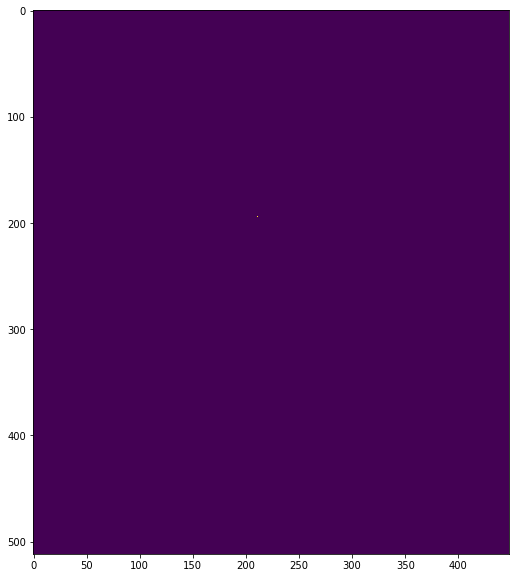

In [228]:
print(lidar_data.shape)
plt.figure(figsize=(10, 10))
temp = np.max(temp2, 2)
print(temp.shape)
plt.imshow(temp)

bb3d xpnd cam2 image [-3.33952435e+03 -4.58860036e+03 -3.38192955e+00]
bb3d xpnd cam2 image [9.87461240e+02 1.35679951e+03 1.00000000e+00]
bb3d xpnd cam2 image [ 4.20413720e+02 -6.57127686e+03  2.67224737e+00]
bb3d xpnd cam2 image [ 1.57325899e+02 -2.45908254e+03  1.00000000e+00]
bb3d xpnd cam2 image [-4.36291405e+03 -4.36602623e+04 -3.49607011e+00]
bb3d xpnd cam2 image [1.24794810e+03 1.24883829e+04 1.00000000e+00]
bb3d xpnd cam2 image [-3.36425636e+01 -2.50827507e+04  2.52006130e+00]
bb3d xpnd cam2 image [-1.33498989e+01 -9.95323040e+03  1.00000000e+00]
bb3d xpnd cam2 image [112854.40490061 531521.45773951  -1010.79044385]
bb3d xpnd cam2 image [-111.64965556 -525.84733163    1.        ]
bb3d xpnd cam2 image [112854.40490061 531521.45773951  -1010.79044385]
bb3d xpnd cam2 image [-111.64965556 -525.84733163    1.        ]
bb3d [[   -3.17     1.77     5.46]
 [    2.84     1.63     9.72]
 [   -3.85     2.52    59.59]
 [    2.42     1.86    35.34]
 [-1000.   -1000.   -1000.  ]
 [-1000.   

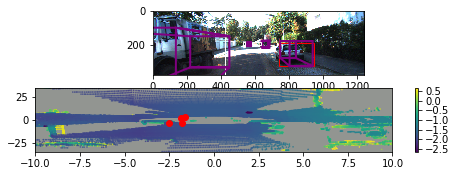

In [193]:
"""
Created on Sat Mar 24 12:38:17 2018
The KITTI is one of the well known benchmarks for 3D Object detection. Working 
on this dataset requires some understanding of what the different files and their
contnts are. In this piece we use  4 different types of files used from the 
KITTI 3D Objection Detection dataset as follows to do some basic manipulation 
and sanity checks to get basic underdstanding. 
 camera2 image (.png), 
 camera2 label label (.txt),
 calibration (.txt), 
 velodyne point cloud (.bin),
Codes to project 3D data from  camera co-ordinate and velodyne coordinate to  
camera image.  The goal is to see if the  data along with appropriate geometry 
matrices are handled correctly.  2 different types of images are generated - 
camera2 image and bird's eye view of point cloud.  
@author: sg
Refs :
  1. Vision meets Robotics: The KITTI Dataset - http://www.cvlibs.net/publications/Geiger2013IJRR.pdf
  2. 3D Object Detection Evaluation 2017 - http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=3d
  3. Download left color images of object data set (12 GB) - http://www.cvlibs.net/download.php?file=data_object_image_2.zip
  4. Download Velodyne point clouds, if you want to use laser information (29 GB) - http://www.cvlibs.net/download.php?file=data_object_velodyne.zip
  5. Download camera calibration matrices of object data set (16 MB) - http://www.cvlibs.net/download.php?file=data_object_calib.zip
  6. Download training labels of object data set (5 MB) - http://www.cvlibs.net/download.php?file=data_object_label_2.zip
  7. Download object development kit (1 MB) (including 3D object detection and bird's eye view evaluation code) - http://kitti.is.tue.mpg.de/kitti/devkit_object.zip
  
"""

import os
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from   matplotlib.path import Path
from matplotlib import colors
import numpy as np
from PIL import Image
from math import sin, cos
import argparse


basedir = 'C:/data/kitti/data_small/training' # windows
basedir = '../data.2/object/training' # *nix
basedir = 'data' # *nix
left_cam_rgb= 'image_2'
label = 'label_2'
velodyne = 'velodyne'
calib = 'calib'


def loadKittiFiles (frame) :
  '''
  Load KITTI image (.png), calibration (.txt), velodyne (.bin), and label (.txt),  files
  corresponding to a shot.
  Args:
    frame :  name of the shot , which will be appended to externsions to load
                the appropriate file.
  '''
  # load image file 
  fn = '/Volumes/My Passport/Kitti_data/data_object_image_3/training/image_3/' + frame+'.png'
#   fn = os.path.join(basedir, left_cam_rgb, frame+'.png')
  left_cam = Image.open(fn).convert ('RGB')
  
  # load velodyne file 
  fn = '/Volumes/My Passport/Kitti_data/data_object_velodyne/training/velodyne/' + frame+'.bin'
#   fn = os.path.join(basedir, velodyne, frame+'.bin')
  velo = np.fromfile(fn, dtype=np.float32).reshape(-1, 4)
  
  # load calibration file
  fn = '/Volumes/My Passport/Kitti_data/data_object_calib/training/calib/' + frame+'.txt'
#   fn = os.path.join(basedir, calib, frame+'.txt')
  calib_data = {}
  with open (fn, 'r') as f :
    for line in f.readlines():
      if ':' in line :
        key, value = line.split(':', 1)
        calib_data[key] = np.array([float(x) for x in value.split()])
  
  # load label file
  fn = '/Volumes/My Passport/Kitti_data/training/label_2/' + frame+'.txt'
#   fn = os.path.join(basedir, label, frame+'.txt')
  label_data = {}
  with open (fn, 'r') as f :
    for line in f.readlines():
      if len(line) > 3:
        key, value = line.split(' ', 1)
        #print ('key', key, 'value', value)
        if key in label_data.keys() :
          label_data[key].append([float(x) for x in value.split()] )
        else:
          label_data[key] =[[float(x) for x in value.split()]]

  for key in label_data.keys():
    label_data[key] = np.array( label_data[key])
    
  return left_cam, velo, label_data, calib_data



def computeBox3D(label, P):
  '''
  takes an object label and a projection matrix (P) and projects the 3D
  bounding box into the image plane.
  
  (Adapted from devkit_object/matlab/computeBox3D.m)
  
  Args:
    label -  object label list or array
  '''
  w = label[7]
  h = label[8]
  l = label[9]
  x = label[10]
  y = label[11]
  z = label[12]
  ry = label[13]
  
  # compute rotational matrix around yaw axis
  R = np.array([ [+cos(ry), 0, +sin(ry)],
                 [0, 1,               0],
                 [-sin(ry), 0, +cos(ry)] ] )

  # 3D bounding box corners

  x_corners = [0, l, l, l, l, 0, 0, 0] # -l/2
  y_corners = [0, 0, h, h, 0, 0, h, h] # -h
  z_corners = [0, 0, 0, w, w, w, w, 0] # --w/2
  
  x_corners += -l/2
  y_corners += -h
  z_corners += -w/2
  
  
  # bounding box in object co-ordinate
  corners_3D = np.array([x_corners, y_corners, z_corners])
  #print ( 'corners_3d', corners_3D.shape, corners_3D)
  
  # rotate 
  corners_3D = R.dot(corners_3D)
  #print ( 'corners_3d', corners_3D.shape, corners_3D)
  
  #translate 
  corners_3D += np.array([x, y, z]).reshape((3,1))
  #print ( 'corners_3d', corners_3D)
  

  
  corners_3D_1 = np.vstack((corners_3D,np.ones((corners_3D.shape[-1]))))
  corners_2D = P.dot (corners_3D_1)
  corners_2D = corners_2D/corners_2D[2]
  
  # edges, lines 3d/2d bounding box in vertex index 
  edges = [[0,1], [1,2], [2,3], [3,4], [4,5], [5,6], [6,7], [7,0], [0,5], [1,4], [2,7], [3, 6]]
  lines = [[0,1], [1,2], [2,3], [3,4], [4,5], [5,6], [6,7], [7,0], [0,5], [5, 4], [4, 1], [1,2], [2,7], [7,6], [6,3]]
  bb3d_lines_verts_idx = [0,1,2,3,4,5,6,7,0,5,4,1,2,7,6,3]
  
  bb2d_lines_verts = corners_2D[:,bb3d_lines_verts_idx] # 
   
  return corners_2D[:2], corners_3D, bb2d_lines_verts[:2]
  
  
  
 
def labelToBoundingBox(ax, labeld, calibd):
  '''
  Draw 2D and 3D bpunding boxes.  
  
  Each label  file contains the following ( copied from devkit_object/matlab/readLabels.m)
  #  % extract label, truncation, occlusion
  #  lbl = C{1}(o);                   % for converting: cell -> string
  #  objects(o).type       = lbl{1};  % 'Car', 'Pedestrian', ...
  #  objects(o).truncation = C{2}(o); % truncated pixel ratio ([0..1])
  #  objects(o).occlusion  = C{3}(o); % 0 = visible, 1 = partly occluded, 2 = fully occluded, 3 = unknown
  #  objects(o).alpha      = C{4}(o); % object observation angle ([-pi..pi])
  #
  #  % extract 2D bounding box in 0-based coordinates
  #  objects(o).x1 = C{5}(o); % left   -> in pixel
  #  objects(o).y1 = C{6}(o); % top
  #  objects(o).x2 = C{7}(o); % right
  #  objects(o).y2 = C{8}(o); % bottom
  #
  #  % extract 3D bounding box information
  #  objects(o).h    = C{9} (o); % box width    -> in object coordinate
  #  objects(o).w    = C{10}(o); % box height
  #  objects(o).l    = C{11}(o); % box length
  #  objects(o).t(1) = C{12}(o); % location (x) -> in camera coordinate 
  #  objects(o).t(2) = C{13}(o); % location (y)
  #  objects(o).t(3) = C{14}(o); % location (z)
  #  objects(o).ry   = C{15}(o); % yaw angle  -> rotation aroun the y/vetical axis
  '''
  
  # Velodyne to/from referenece camera (0) matrix
  Tr_velo_to_cam = np.zeros((4,4))
  Tr_velo_to_cam[3,3] = 1
  Tr_velo_to_cam[:3,:4] = calibd['Tr_velo_to_cam'].reshape(3,4)
  #print ('Tr_velo_to_cam', Tr_velo_to_cam)
  
  Tr_cam_to_velo = np.linalg.inv(Tr_velo_to_cam)
  #print ('Tr_cam_to_velo', Tr_cam_to_velo)
  
  # 
  R0_rect = np.zeros ((4,4))
  R0_rect[:3,:3] = calibd['R0_rect'].reshape(3,3)
  R0_rect[3,3] = 1
  #print ('R0_rect', R0_rect)
  P2_rect = calibd['P2'].reshape(3,4)
  #print('P2_rect', P2_rect)
  
  bb3d = []
  bb2d = []
  
  for key in labeld.keys ():
    
    color = 'white'
    if key == 'Car':
      color = 'red'
    elif key == 'Pedestrian':
      color = 'pink'
    elif key == 'Cyclist':
      color = 'purple'
    elif key == 'DontCare':
      color = 'white'
    
   
    for o in range( labeld[key].shape[0]):
      
      #2D
      left   = labeld[key][o][3]
      bottom = labeld[key][o][4]
      width  = labeld[key][o][5]- labeld[key][o][3]
      height = labeld[key][o][6]- labeld[key][o][4]
    
      
      p = patches.Rectangle(
        (left, bottom), width, height, fill=False, edgecolor=color, linewidth=1)
      ax.add_patch(p)
      
      xc = (labeld[key][o][5]+labeld[key][o][3])/2
      yc = (labeld[key][o][6]+labeld[key][o][4])/2
      bb2d.append([xc,yc])
      
      #3D
      w3d = labeld[key][o][7]
      h3d = labeld[key][o][8]
      l3d = labeld[key][o][9]
      x3d = labeld[key][o][10]
      y3d = labeld[key][o][11]
      z3d = labeld[key][o][12]
      yaw3d = labeld[key][o][13]
      
   
      if key != 'DontCare' :
        
        corners_2D, corners_3D, paths_2D = computeBox3D(labeld[key][o], P2_rect)
        verts = paths_2D.T # corners_2D.T
        codes = [Path.LINETO]*verts.shape[0]
        codes[0] = Path.MOVETO
        pth  = Path (verts, codes)
        p = patches.PathPatch( pth, fill=False, color='purple', linewidth=2)
        ax.add_patch(p)
        
        
  
      # a sanity test point in velodyne co-ordinate to check  camera2 imaging plane projection
      testp = [ x3d, y3d, z3d]
      bb3d.append(testp)

      xnd = np.array(testp+[1.0])
      #print ('bb3d xnd velodyne   ', xnd)
      #xpnd = P2.dot(R0_rect.dot(Tr_velo_to_cam.dot(xnd)))
      xpnd = Tr_velo_to_cam.dot(xnd)
      #print ('bb3d xpnd cam0      ', xpnd)
      xpnd = R0_rect.dot(xpnd)
      #print ('bb3d xpnd rect cam0 ', xpnd)
      xpnd = P2_rect.dot(xpnd)
      print ('bb3d xpnd cam2 image', xpnd)
      print ('bb3d xpnd cam2 image', xpnd/xpnd[2])

#       p = patches.Rectangle( pth, fill=False, color='red', linewidth=2)

#       p = patches.Circle( (xpnd[0]/xpnd[2], xpnd[1]/xpnd[2]), fill=False, radius=5, color='red', linewidth=1)
#       ax.add_patch(p)
  
  return np.array(bb2d), np.array(bb3d)


def pointCloudToBirdsEyeView(ax2, velo, bb3d):
  ax2.set_xlim (-10,10)
  ax2.set_ylim (-35,35)
  hmax = velo[:,2].max()
  hmin = velo[:,2].min()
  hmean = velo[:, 2].mean()
  hmeadian = np.median ( velo[:, 2] )
  hstd = np.std(velo[:, 2])
  #print ('scalledh', hmax, hmean, hmeadian, hmin, hstd, scalledh.shape, scalledh[:10])
  norm = colors.Normalize(hmean-2*hstd, hmean+2*hstd, clip=True)
  sc2= ax2.scatter(-velo[:,1],
             velo[:,0],
             s = 1,
             c=velo[:,2],
             cmap = 'viridis',
             norm=norm,
             marker = ".",
             )
  ax2.scatter(-bb3d[:,1],
             bb3d[:,0],
             c='red')
  ax2.set_facecolor('xkcd:grey')
  plt.colorbar(sc2)

def main (frame='000008'):
  """
  Completes the plots 
  """
  left_cam, velo, label_data, calib_data = loadKittiFiles(frame)
  
  f = plt.figure(figsize=plt.figaspect(0.5))
  
  # show the left camera image 
  ax = f.add_subplot(3,1,1,)
  ax.imshow(left_cam)
  
  
  bb2d, bb3d = labelToBoundingBox(ax, label_data, calib_data)
  print ('bb3d', bb3d)
  print ('bb2d', bb2d)
  
  # point cloud to bird's eye view scatter plot
  ax2 = f.add_subplot(3,1,2, )#projection="3d" )
  pointCloudToBirdsEyeView(ax2, velo, bb3d)

  
  plt.show()


if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  parser.add_argument('--frame', type=str,
                      default='000019',
                      help='frame name without extension')
  FLAGS, unparsed = parser.parse_known_args()
  #print ('FLAGS', FLAGS)
  main(frame=FLAGS.frame)

In [14]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1964018690428927198]